In [38]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it 
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/" 
import sys
sys.path.append(home)      # add home folder to module search path

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/lutzhamel/ds-assets
   bf8fc96..7815382  main       -> origin/main
Updating bf8fc96..7815382
Fast-forward
 assets/elbow.py | 33 +++++++++++++--------------------
 1 file changed, 13 insertions(+), 20 deletions(-)


# Unsupervised Learning: Clustering

Unsupervised learning broadly falls into two categories:

1. Dimension reduction
1. Clustering

Here we focus on clustering of data. 
Unsupervised machine learning as clustering is the machine learning task of inferring a function that describes the hidden structure from *unlabeled* data,

> In unlabeled data a concept, classification, or categorization is not included with the observations, that is, there is no target or dependent variable in the dataset under investigation!


# The k-Means Algorithm


Perhaps the most wellknown clustering algorithm is the k-means algorithm.
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled, numeric dataset – the k in the name.
It accomplishes this using a simple concept of what the optimal clustering looks like:

* A *cluster center* is the arithmetic mean of all the points belonging to that cluster – the  mean in the name.
* Each point is closer to its own cluster center than to any other cluster center in the dataset.

Those two assumptions are the basis of the k-means model. 

Source: [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

## Visualization of k-Means

Before we take a look at the algorithm itself let's build up some intuition by visualizing the k-means model.  As stated before, the model is simply a set of k points in the same data dimensionality as the training data and the k-means algorithm places those points at the centers of the clusters it found. Here we visualize the k-means model on a synthetic dataset where we now the number of clusters contained in the data.

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

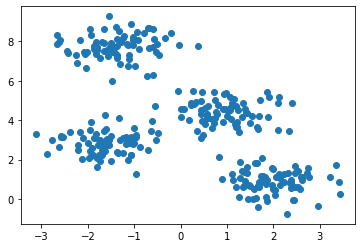

In [40]:
# generate data with 4 clusters.
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1]);
plt.show()

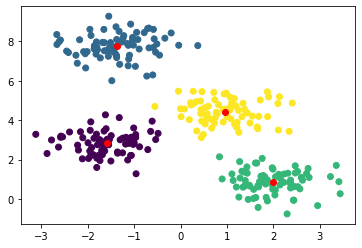

In [41]:
# build a k-means model with k=4
model = KMeans(n_clusters=4)
model.fit(X)

# plot clusters by color according to cluster model
y_kmeans = model.predict(X) # assign each point to a cluster
plt.scatter(X[:,0], X[:,1], c=y_kmeans)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

## A More Detailed Look at k-Means: Expectation Maximization

The expectation–maximization approach here consists of the following procedure:

* Guess some cluster centers
* Repeat until converged
    1. E-Step: assign points to the nearest cluster center
    1. M-Step: set the cluster centers to the mean

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to - in this context expectation is just a fancy word of mean/average.

The "M-step" or "Maximization step" is so-named because it involves maximizing the mean of the data in each cluster.

[Demo](http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)


### The "k" in k-Means

One of the big drawbacks of the k-means algorithm is the necessity to "guess" the correct number of clusters to find in the data. Consider the consequences of an incorrect value for k.  

First we consider the case where k is picked too large.  Here we have four actual clusters in the data but we are searching for 6.  Notice that k-means starts to split existing clusters into non-existing sub-clusters.

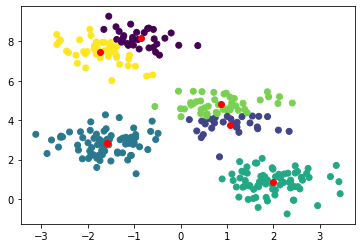

In [42]:
# cluster blobs with non-optimal value for k
model = KMeans(n_clusters=6)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

Next we consider the case where we select k too small.  Here we select k to be the value 2. Notice how k-means starts to merge existing clusters.

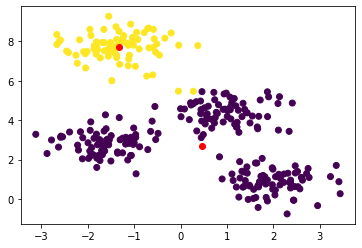

In [43]:
# cluster blobs with non-optimal value for k
model = KMeans(n_clusters=2)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

### The Elbow Method

We will use the elbow method in order to determine the optimal value for k.  The elbow method computes different cluster models and 
computes the variance between clusters.  The characteristic crick in the curve  of the elbow is where the variance between the clusters changes drastically.  Increasing k beyound the value at the crick will not improve the model.  In fact, it is likely that it will lead to "phantom" clusters as we saw above when we picked k too large where large, coherent clusters are split due to the fact that k-means has to find exactly k clusters.


This interactive piece of code demonstrates this.  As long as we pick the k from the elbow of the curve we obtain good cluster models.

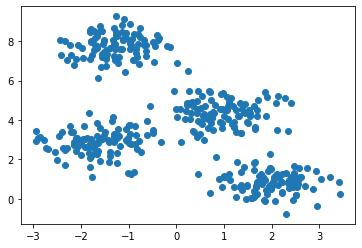

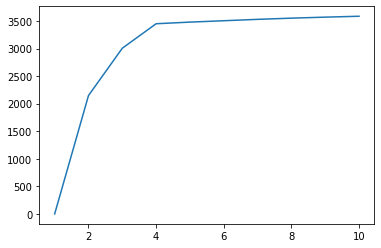

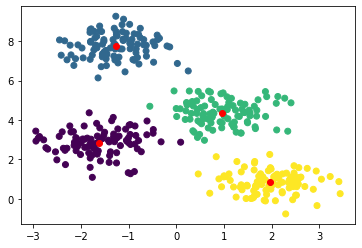

In [69]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from elbow import plot_elbow

# generate the data
k_data = int(input("Number of clusters to generate: "))
X, y = make_blobs(n_samples=k_data*100, centers=k_data, cluster_std=0.60, random_state=0)

# plot clusters
plt.scatter(X[:,0], X[:,1]);
plt.show()

# generate elbow plot
plot_elbow(pd.DataFrame(X),10)

# build model for the given k
k_clusters = int(input("Number of clusters to model: "))
model = KMeans(n_clusters=k_clusters)
model.fit(X)
labels = model.predict(X)

# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

### K-Means and Non-Convex Clusters

Another drawback of k-means is that it assumes that all clusters are convex (ball-like).  If the cluster structure in the dataset does not conform to that assumption k-means will likely not perform very well.  We demonstrate that with a dataset where the clusters are "moon" shaped.

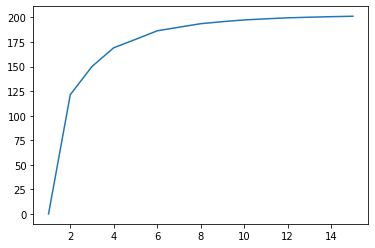

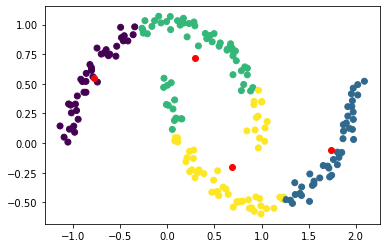

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from elbow import plot_elbow

# generate data
X, y = make_moons(200, noise=.05)

# generate elbow plot to find optimal k
plot_elbow(pd.DataFrame(X),15)

# fit model
k = 4 # from elbow plot
model = KMeans(n_clusters=k)
model.fit(X)
labels = model.predict(X)


# plot clusters by color according to cluster model
plt.scatter(X[:,0], X[:,1], c=labels)

# plot centers
centers = model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red')

plt.show()

It is clear from the last plot that k-means did not pick up on the underlying cluster structure.

# Example: Clustering Digits

The digits data set consists of 1,797 samples each consisting of an 8 × 8 grid of pixels (64 features) representing a handwritten digits between 0 and 9.

**Question**: can we use k-means to learn a representation of these digits that will summarize the roughly 1800 sample with 10 centroids -- each centroid representing a single digit?


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

## Training data

In [47]:
# Training data
digits = load_digits()
digits.data[:5,]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

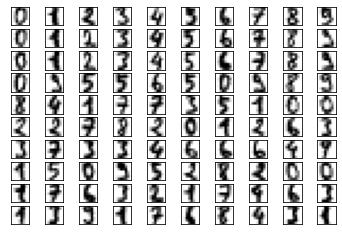

In [48]:
# show the first 100 digits from training data.
fig, ax = plt.subplots(10, 10)

sample = digits.data[:100].reshape(100, 8, 8)

for axi, d in zip(ax.flat, sample):
    axi.set(xticks=[], yticks=[])
    axi.imshow(d, cmap=plt.cm.binary)

## Model

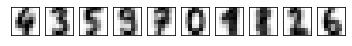

In [49]:
# build model
model = KMeans(n_clusters=10, random_state=0)
model.fit(digits.data)

# reshape centroids into 8x8 images
centers = model.cluster_centers_.reshape(10, 8, 8)

# print out centroids of model
fig, ax = plt.subplots(1, 10)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap=plt.cm.binary)

We can now use the model to do **character recognition**!

In [50]:
# translation table - depends on the fact that our model always
# produces the centroids in the same numerical order.
translation = [
    'four',
    'three',
    'one',
    'two',
    'nine',
    'zero',
    'seven',
    'six',
    'five',
    'eight',
    ]

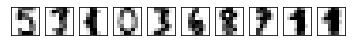

['two',
 'three',
 'six',
 'zero',
 'three',
 'eight',
 'six',
 'nine',
 'seven',
 'seven']

In [51]:
# grab some random digits
random_digits = shuffle(digits.data)[:10,]

# print the digits
fig, ax = plt.subplots(1, 10)
for axi, d in zip(ax.flat, random_digits.reshape(10, 8, 8)):
    axi.set(xticks=[], yticks=[])
    axi.imshow(d, cmap=plt.cm.binary)
plt.show()

# classify and translate the digits into strings
[translation[i] for i in model.predict(random_digits)]

# Example: Color Quantization using K-Means

In computer graphics, color quantization or color image quantization is a process that reduces the number of distinct colors used in an image, usually with the intention that the new image should be as visually similar as possible to the original image.

An example image in 24-bit RGB color, <br>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e3/Dithering_example_undithered.png">

The same image reduced to a palette of 16 colors specifically chosen to best represent the image; the selected palette is shown by the squares on the bottom of the image,<br>
<img src="https://upload.wikimedia.org/wikipedia/en/4/48/Dithering_example_undithered_16color_palette.png">

The palette is chosen using the k-means algorithm in RGB color space,<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Rosa_Gold_Glow_2_small_noblue_color_space.png" height="300" width="300">

(source: [Wikipedia](https://en.wikipedia.org/wiki/Color_quantization))

## China Temple Example

Performs a pixel-wise Vector Quantization (VQ) of an image of the summer palace
(China), reducing the number of colors required to show the image from 96,615
unique colors to 16, while preserving the overall appearance quality.

Based on the [quantization example from SKlearn](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py)

In [52]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [53]:
# number of colors to use for compression
n_colors = 16

### Image Data

In [54]:
# Load the Summer Palace photo
china = load_sample_image("china.jpg")
china.shape

(427, 640, 3)

In [55]:
china[:4,:4,]

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        [174, 201, 231]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        [174, 201, 231]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        [174, 201, 231]],

       [[175, 202, 232],
        [175, 202, 232],
        [175, 202, 232],
        [175, 202, 232]]], dtype=uint8)

In [56]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255
china[:4,:4,]

array([[[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235]],

       [[0.6745098 , 0.78039216, 0.89803922],
        [0.67843137, 0.78431373, 0.90196078],
        [0.67843137, 0.78431373, 0.90196078],
        [0.68235294, 0.78823529, 0.90588235]],

       [[0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235],
        [0.68235294, 0.78823529, 0.90588235]],

       [[0.68627451, 0.79215686, 0.90980392],
        [0.68627451, 0.79215686, 0.90980392],
        [0.68627451, 0.79215686, 0.90980392],
        [0.68627451, 0.79215686, 0.90980392]]])

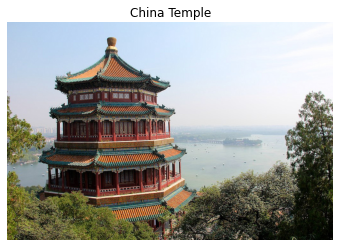

In [57]:
# show the image
plt.clf()
plt.axis('off')
plt.title('China Temple')
plt.imshow(china)
plt.show()

### Training Data

In [58]:
# transform to a 2D numpy array for training the k-means model

w, h, d = china.shape
assert d == 3

# the array is now a list of color values: list of points in RGB space.
image_array = np.reshape(china, (w * h, d))
image_array[:25,]

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.67843137, 0.79215686, 0.90980392],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.67843137, 0.79215686, 0.90980392],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.6745098 , 0.78823529, 0.90588235],
       [0.68235294, 0.79607843, 0.91372549],
       [0.68627451, 0.8       , 0.91764706],
       [0.68235294, 0.79607843, 0.91372549],
       [0.67843137, 0.79215686, 0.90980392],
       [0.68235294, 0.79607843, 0.91372549],
       [0.69019608, 0.79607843, 0.91372549],
       [0.69019608, 0.79607843, 0.91372549],
       [0.

In [59]:
len(image_array)

273280

In [60]:
# Fitting k-means model on a 1% sub-sample of the data for speed reasons
image_array_sample = shuffle(image_array, random_state=0)[:len(image_array)//100]

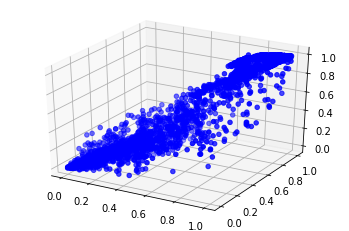

In [61]:
# plot the colors of training data - plot training RGB space
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(image_array_sample[:,0], image_array_sample[:,1], image_array_sample[:,2],c='blue');
plt.show()

### Model Building

In [62]:
# train the model with n_colors
model = KMeans(n_clusters=n_colors, random_state=0)
model.fit(image_array_sample)

# the cluster centers now represent the new colors
model.cluster_centers_

array([[0.7507917 , 0.84034785, 0.94168513],
       [0.23807646, 0.23853653, 0.18413846],
       [0.06114551, 0.05660475, 0.03441692],
       [0.5403794 , 0.53731867, 0.45477443],
       [0.94633084, 0.96198523, 0.98592911],
       [0.58288003, 0.64090238, 0.6363483 ],
       [0.37057575, 0.32766329, 0.25477707],
       [0.49186275, 0.4677451 , 0.27003268],
       [0.71647309, 0.75466467, 0.74804546],
       [0.36944314, 0.30014118, 0.11764706],
       [0.17204625, 0.13634992, 0.1015083 ],
       [0.34307784, 0.4211527 , 0.39744504],
       [0.81310212, 0.83030715, 0.8471495 ],
       [0.72343137, 0.41813725, 0.30245098],
       [0.87175018, 0.66840959, 0.4962963 ],
       [0.8699988 , 0.9143029 , 0.9650427 ]])

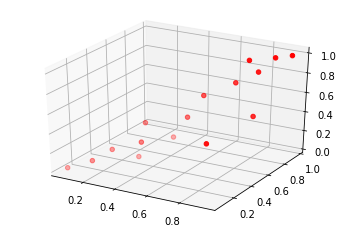

In [63]:
# plot the colors of the k-means model
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2],c='red');
plt.show()

### Build Compressed Image

In [64]:
# map each pixel in the image into a color cluster
new_color_label_array = model.predict(image_array)
shuffle(new_color_label_array)[:32]

array([ 4, 15, 10, 12, 15,  6,  8,  6,  0,  0, 10, 15,  4,  6,  7, 12,  1,
        3,  4,  1, 14, 10,  2, 14,  4,  4, 10,  4,  4,  6,  2, 15],
      dtype=int32)

In [65]:
# create a new image array based on the new colors
new_image_array = np.zeros((w*h,d))
for i in range(w*h):
    new_image_array[i] = model.cluster_centers_[new_color_label_array[i]]

# reshape the new image array into a new image with the same dimensions as the original image.
new_image = np.reshape(new_image_array,(w,h,d))

### Image Comparison

Not only do we show the original and the compressed image but we also save them to files so we can look at the effect that color quantization has on image file size.

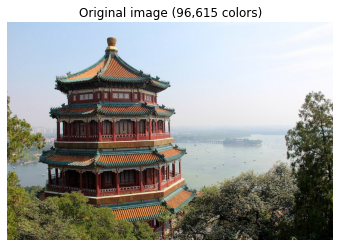

In [66]:
# original image
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)
plt.savefig("original.png", format='png')
plt.show()

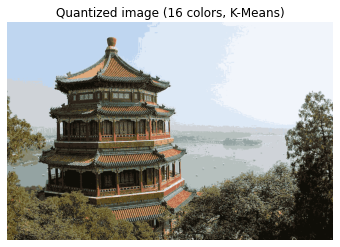

In [67]:
# quantized image
plt.clf()
plt.axis('off')
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.imshow(new_image)
plt.savefig("compressed.png", format='png')
plt.show()

The sizes of the files are shown in KBytes.

In [68]:
!ls -s -k original.png
!ls -s -k compressed.png

140 original.png
120 compressed.png


# Final Project Proposal

The final project could be a (team) app (e.g. Python script that implements some non-trivial functionality with/without visualization or an app built on your favorite platform) or it can be an individual analysis project. 

Details in BrightSpace.
